In [1]:
import tike.ptycho
import numpy as np
import matplotlib.pyplot as plt
import importlib

In [2]:
for module in [tike, np]:
    print("{} is version {}".format(module.__name__, module.__version__))

tike is version 0.6.2.dev27+ge8455f0
numpy is version 1.15.4


# Create test data

Make a test data for pytchography reconstruction at one projection angle.

### Define the object

Normalize input uint8 images to the `[0, 1]` and `[0, pi]` ranges.

In [3]:
amplitude = plt.imread("../tests/data/Cryptomeria_japonica-0128.tif") / 255
phase = plt.imread("../tests/data/Bombus_terrestris-0128.tif") / 255 * np.pi
np.min(phase), np.max(phase)

(0.036959913571644624, 3.129272682399245)

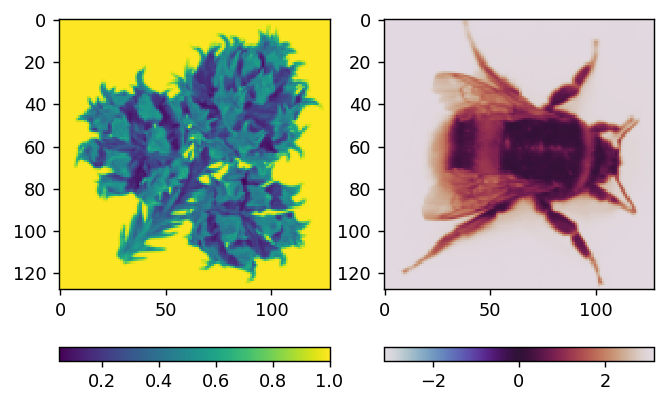

(128, 128)

In [4]:
original = amplitude * np.exp(1j * phase)
tike.plot_phase(original)
original.shape

### Define the probe

(-0.9999241101148306+0.012319659535238529j) (0.9951469164070644+0.0984002782796427j)


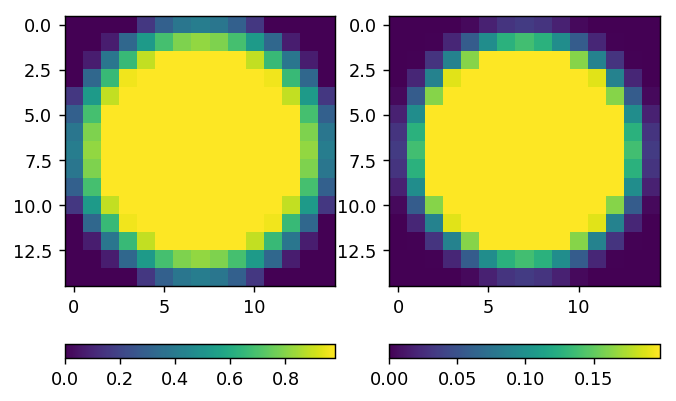

In [5]:
pw = 15 # probe width
weights = tike.ptycho.gaussian(pw, rin=0.8, rout=1.0)
probe = weights * np.exp(1j * weights * 0.2)
tike.plot_complex(probe)

### Define the trajectory

In [6]:
v, h = np.meshgrid(
    np.linspace(0, amplitude.shape[0]-pw, 24, endpoint=True),
    np.linspace(0, amplitude.shape[0]-pw, 24, endpoint=True),
    indexing='ij'
    )
print(v.shape, h.size)

(24, 24) 576


## Simulate data acquisition

In [7]:
# Then what we see at the detector is the wave propagation
# of the near field wavefront
data = tike.ptycho.simulate(data_shape=np.ones(2, dtype=int)*pw*3,
                            probe=probe, v=v, h=h,
                            psi=original)
data = np.random.poisson(data)
data.shape

(576, 45, 45)

/home/beams/DCHING/miniconda3/envs/tike/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


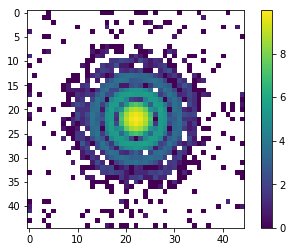

(0, 21881)

In [8]:
plt.imshow(np.fft.fftshift(np.log(data[11])))
plt.colorbar()
plt.show()
np.min(data), np.max(data)

# Reconstruct

Now we need to try and reconstruct psi.

In [9]:
# Start with a guess of all zeros for psi
new_psi = np.ones(original.shape, dtype=complex)

INFO:tike.ptycho:grad on 576 - 45 by 45 grids for 10 iterations


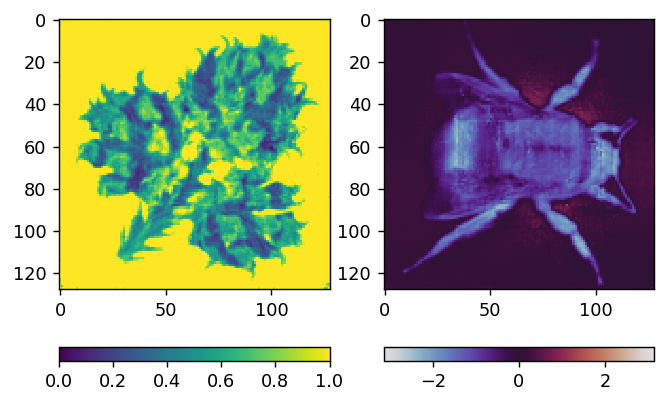

INFO:tike.ptycho:grad on 576 - 45 by 45 grids for 10 iterations


(-0.9585719-1.1081257j) (1.6129664+0.25401613j)


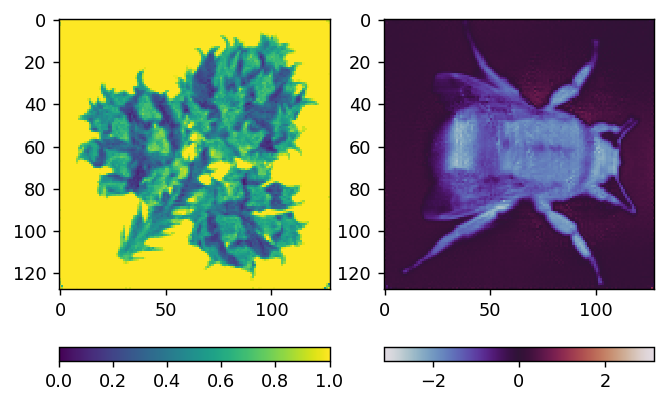

INFO:tike.ptycho:grad on 576 - 45 by 45 grids for 10 iterations


(-0.8517168-0.9442548j) (1.5165757+0.2945128j)


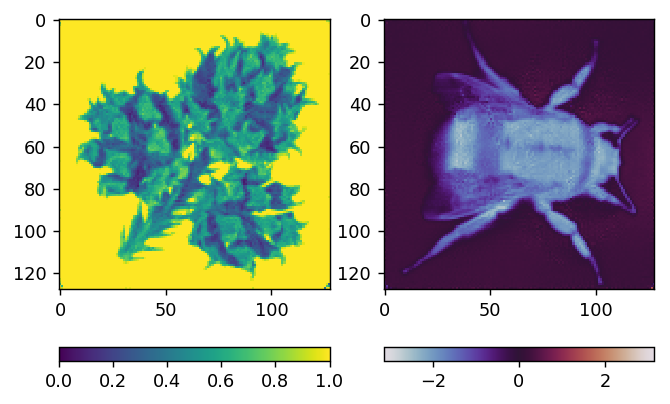

INFO:tike.ptycho:grad on 576 - 45 by 45 grids for 10 iterations


(-0.80254453-0.9048084j) (1.6124132-0.008486511j)


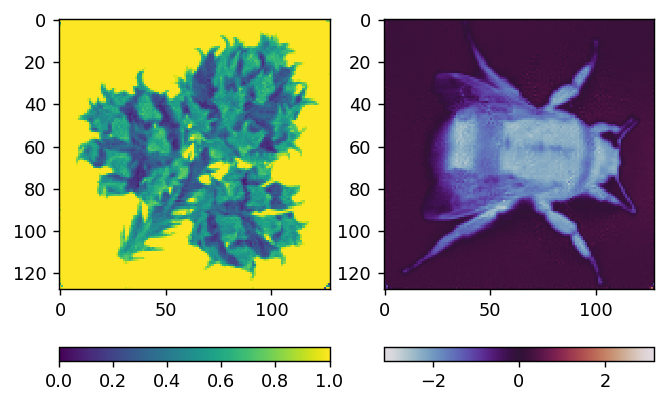

INFO:tike.ptycho:grad on 576 - 45 by 45 grids for 10 iterations


(-0.83614284-0.9273704j) (1.7658372+0.03282369j)


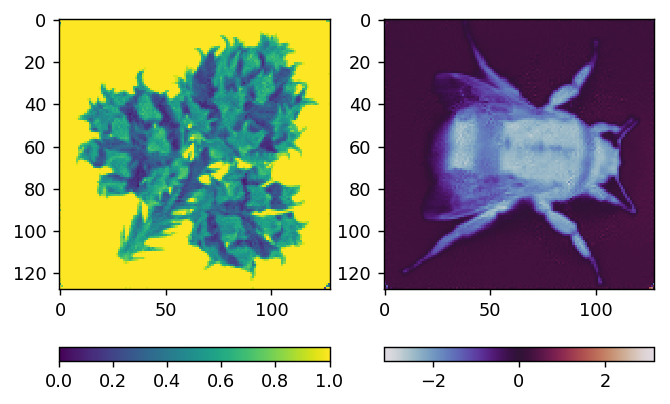

INFO:tike.ptycho:grad on 576 - 45 by 45 grids for 10 iterations


(-0.9157822-0.7738998j) (1.9141392+0.07429104j)


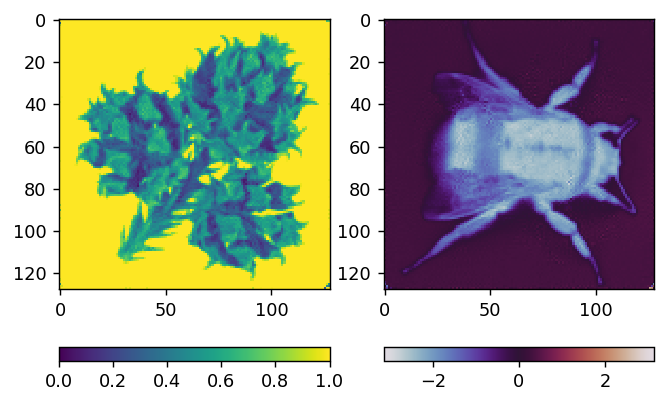

INFO:tike.ptycho:grad on 576 - 45 by 45 grids for 10 iterations


(-1.1328931+1.5344574j) (2.0679777+0.104859695j)


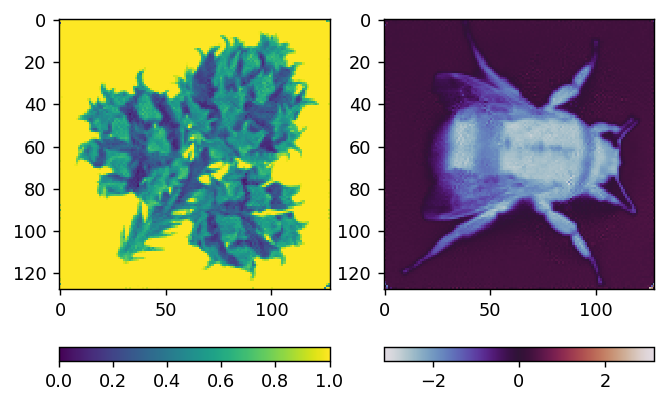

INFO:tike.ptycho:grad on 576 - 45 by 45 grids for 10 iterations


(-1.5280743+1.6982714j) (2.2247505+0.13041048j)


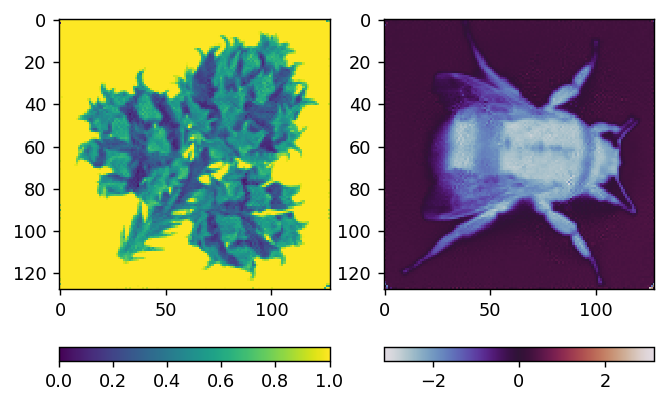

INFO:tike.ptycho:grad on 576 - 45 by 45 grids for 10 iterations


(-1.926064+1.8654065j) (2.401647+0.14585051j)


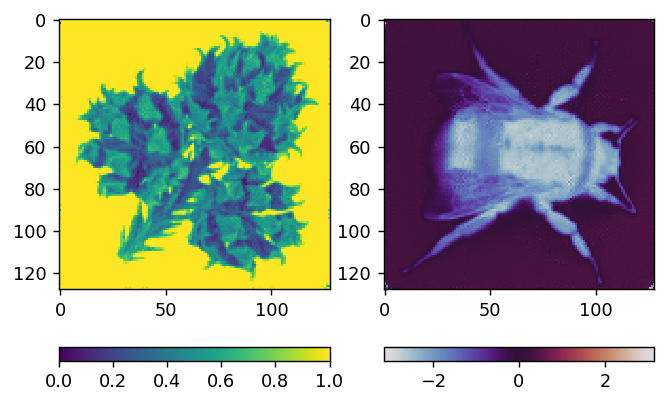

INFO:tike.ptycho:grad on 576 - 45 by 45 grids for 10 iterations


(-2.3256593+2.0407581j) (2.5859003+0.1735439j)


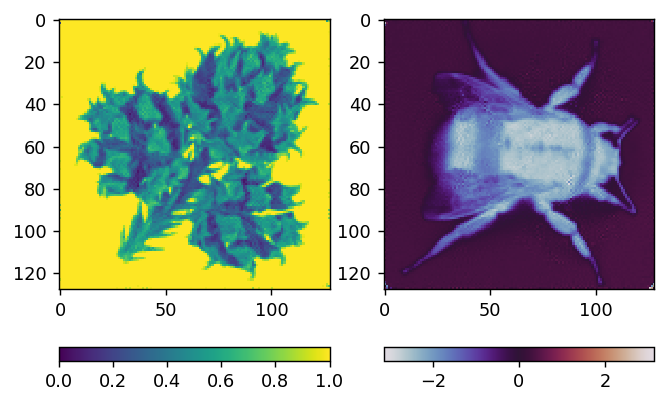

(-2.7276428+2.2228553j) (2.7713287+0.20065163j)


In [10]:
for i in range(10):
    new_psi = tike.ptycho.reconstruct(data=data,
                                      probe=probe, v=v, h=h,
                                      psi=new_psi,
                                      algorithm='grad',
                                      num_iter=10, gamma=1)
    tike.plot_phase(new_psi, amin=0, amax=1)